![image.png](attachment:3b47cc17-971e-42fd-90bc-70aa2e46a2e2.png)                                                               
# Assigned Task - Epidemiology Internship Track (Python)
Prepared by: Melanie Atieno Omondi.                                                                                                     
Date: 26/04/2025.

- As an initial task at the Center for Epidemiological Modeling and Analysis, you are presented with a dataset from an epidemiological research project, "Analyzing Regional Trends in Influenza-Like Illness (ILI) in Kenya: A Quantitative Epidemiology Case Study." 

- The study collected data on year (2023-2024), the epidemiological week (epi_week), county, age categories (age_group), percentage of outpatient visits due to ILI (ili_percentage), and the estimated population for that age group in that county (population). 

- The objective is to evaluate temporal and county-specific ILI trends and interpret the findings to inform public health decisions

In [3]:
# Importing Pandas library for querying
import pandas as pd

# Importing visualization libraries for visualizing the data.
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the dataframe.
df = pd.read_csv('Epi_Task_Data.csv')

# Checking for null values to ensure the data is complete.
print(df.isnull().sum())

year              0
epi_week          0
county            0
age_group         0
ili_percentage    0
population        0
dtype: int64


In [79]:
# Reading the first three rows.
print (df.head(3))

   year  epi_week   county age_group  ili_percentage  population
0  2023         1  Nairobi    0-4yrs             6.1        3452
1  2024         1  Nairobi    0-4yrs             3.2        3658
2  2023         2  Nairobi    0-4yrs             4.5        3043


# Section A: Descriptive analysis

i.	Compute a table showing the mean ILI percentage per county per year.

In [7]:
# Grouping the data by county and year, then calculating the average influenza-like illness cases(%)
avg_ili = df.groupby(['county', 'year'])['ili_percentage'].mean().reset_index()

print(avg_ili[['county', 'year', 'ili_percentage']])

      county  year  ili_percentage
0   Kakamega  2023           4.060
1   Kakamega  2024           4.540
2     Kiambu  2023           3.895
3     Kiambu  2024           3.705
4     Kisumu  2023           4.065
5     Kisumu  2024           3.725
6   Machakos  2023           3.380
7   Machakos  2024           3.975
8    Mombasa  2023           3.895
9    Mombasa  2024           3.985
10   Nairobi  2023           4.220
11   Nairobi  2024           3.990
12    Nakuru  2023           3.780
13    Nakuru  2024           4.530


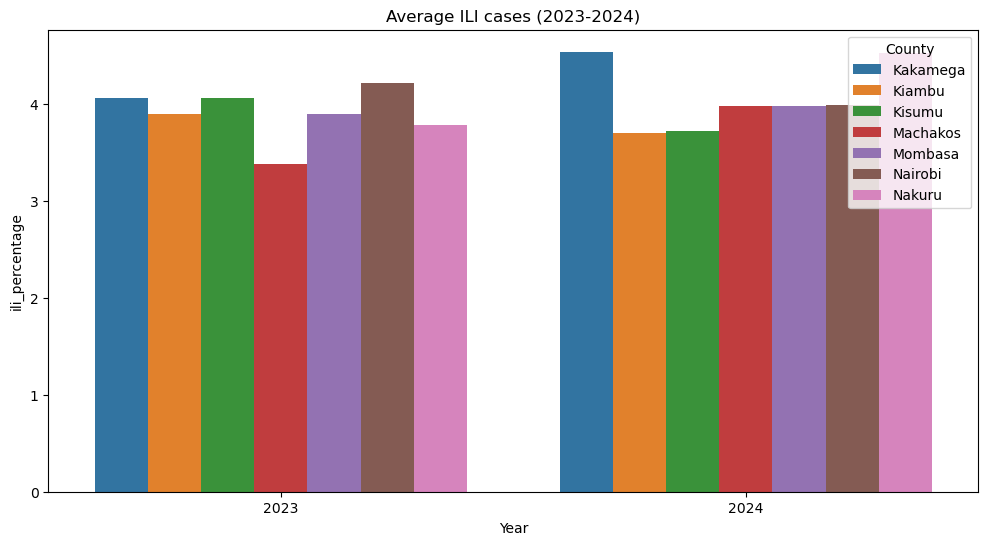

In [90]:
# Visualizing the data
plt.figure(figsize = (12, 6))
sns.barplot(data = avg_ili, x = 'year', y = 'ili_percentage', hue = 'county')

# Customizations
plt.title('Average ILI cases (2023-2024)')
plt.xlabel('Year')
plt.ylabel('ili_percentage')
plt.legend(title = 'County')
plt.savefig('barplot.png')
plt.show()

ii.	A plot of ILI weekly trends identifying the peak ILI weeks across counties and describe in 3-5 sentences the seasonal pattern of ILI cases.

      county  epi_week  ili_percentage
0   Kakamega         1          3.8000
1   Kakamega         2          5.3000
2   Kakamega         3          3.8875
3   Kakamega         4          3.9750
4   Kakamega         5          4.5375
5     Kiambu         1          3.6875
6     Kiambu         2          3.8000
7     Kiambu         3          4.2000
8     Kiambu         4          3.9500
9     Kiambu         5          3.3625
10    Kisumu         1          3.6625
11    Kisumu         2          4.2250
12    Kisumu         3          4.1500
13    Kisumu         4          3.2875
14    Kisumu         5          4.1500
15  Machakos         1          3.7250
16  Machakos         2          3.7500
17  Machakos         3          3.1625
18  Machakos         4          4.6500
19  Machakos         5          3.1000
20   Mombasa         1          4.7250
21   Mombasa         2          3.5500
22   Mombasa         3          3.7000
23   Mombasa         4          3.3375
24   Mombasa         5   

<Figure size 1200x600 with 0 Axes>

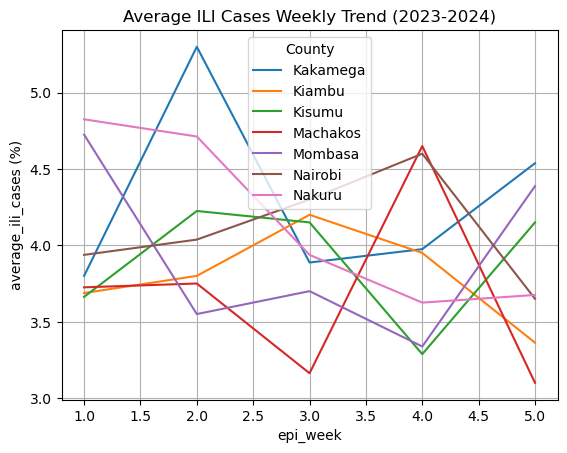

In [92]:
# Grouping the weekly trend data by county and epi_week to aggregate ili_percentage (average).
wt = df.groupby(['county', 'epi_week'])['ili_percentage'].mean().reset_index()

print (wt)

# Pivoting the data to reshape it for plotting (creating a pivot table)
pivot_data = wt.pivot(index = 'epi_week', columns = 'county', values = 'ili_percentage')

# Visualizing the data
plt.figure(figsize = (12, 6))
pivot_data.plot()

# Customizations
plt.title('Average ILI Cases Weekly Trend (2023-2024)')
plt.xlabel('epi_week')
plt.ylabel('average_ili_cases (%)')
plt.legend(title='County')
plt.grid(True)
plt.savefig('wk_trends.png')

plt.show()

# Section B: Computing epidemiological measures

i.	Calculate the incidence rates per 100,000 population across any three counties.

In [31]:
# Grouping data by county to aggregate population and ILI percentage (totals)
grouped = df.groupby(['county']).sum()

# Filtering for Nairobi, Kisumu, and Mombasa 
counties = grouped.loc[['Nairobi', 'Kisumu', 'Mombasa']]

# Calculating the incidence rate for the selected counties 
# Incidence rate = Total new cases per county (2023-2024) / Total population (estimated to be 100,000)
counties['incidence_rate'] = counties['ili_percentage'] * counties['population'] / 100000

print(counties[['incidence_rate']])

         incidence_rate
county                 
Nairobi      270.558908
Kisumu       306.481970
Mombasa      351.879824


ii.	Using any statistical method you are familiar with, compare ILI percentages across any three counties.

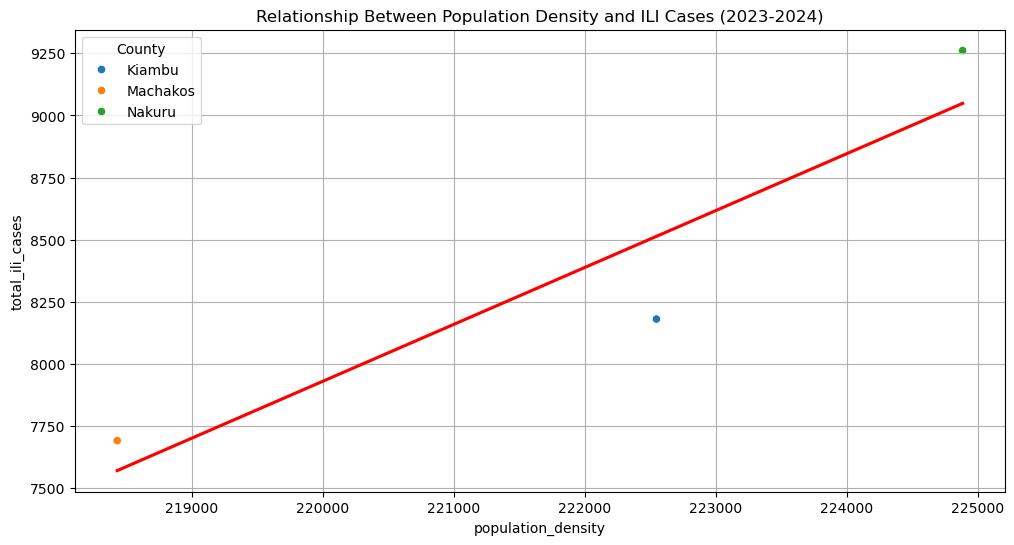

In [94]:
# Step 1: Visualizing the relationship and hypothesis formation.

# Selecting counties and finding total absolute cases
sc = df[df['county'].isin(['Machakos', 'Nakuru', 'Kiambu'])].copy()
sc ['total_cases'] = sc ['ili_percentage'] * sc['population']/100

# Grouping the data by selected counties for aggregation (totals)
new_counties = sc.groupby(['county']).sum()

# Visualizing the scatterplot 
plt.figure(figsize = (12,6))
sns.scatterplot(data = new_counties, x = 'population', y = 'total_cases', hue = 'county')

# Adding a trend line
sns.regplot(data = new_counties, x = 'population', y = 'total_cases', scatter = False, color = 'red', ci = None)

# Customizations
plt.title ('Relationship Between Population Density and ILI Cases (2023-2024)')
plt.xlabel ('population_density')
plt.ylabel ('total_ili_cases')
plt.legend (title = 'County')
plt.grid (True)
plt.savefig('scatter_plot.png')

plt.show()

In [83]:
# Step 2: Quantifying the positive linear relationship observed and validating/rejecting the hypothesis.

# Importing regression library
import statsmodels.api as sm

# Defining independent and dependent variables
X = new_counties[['population']]  # Predictor value: Population
y = new_counties['total_cases']   # Target value: Total ILI Cases

# Adding constant (intercept term)
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_cases   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     6.571
Date:                Sat, 26 Apr 2025   Prob (F-statistic):              0.237
Time:                        13:28:43   Log-Likelihood:                -20.677
No. Observations:                   3   AIC:                             45.35
Df Residuals:                       1   BIC:                             43.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.244e+04   1.98e+04     -2.141      0.2

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# Section C: Communicating results

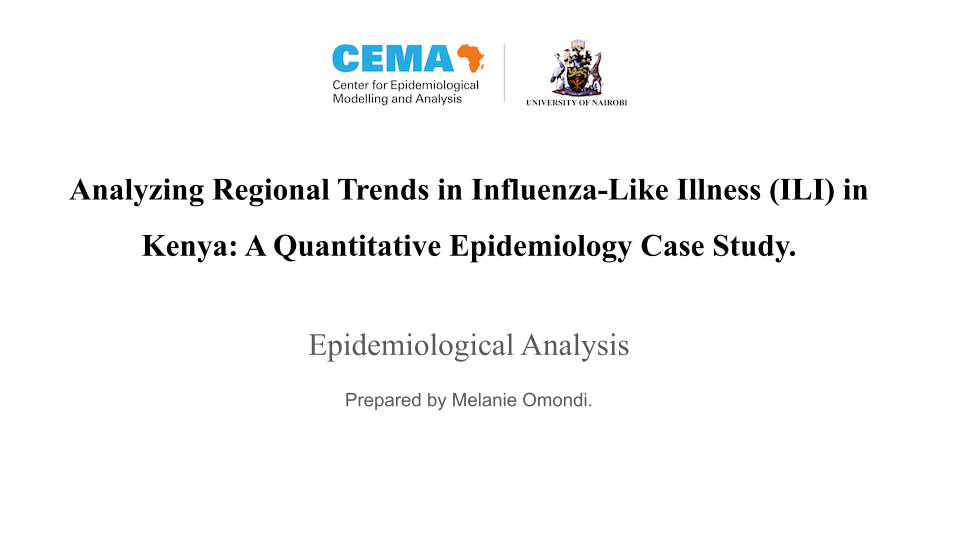

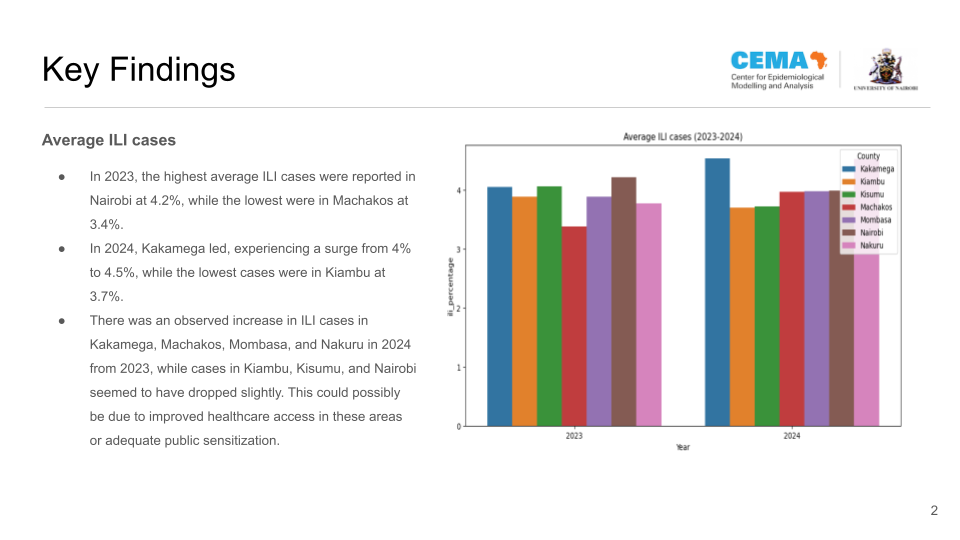

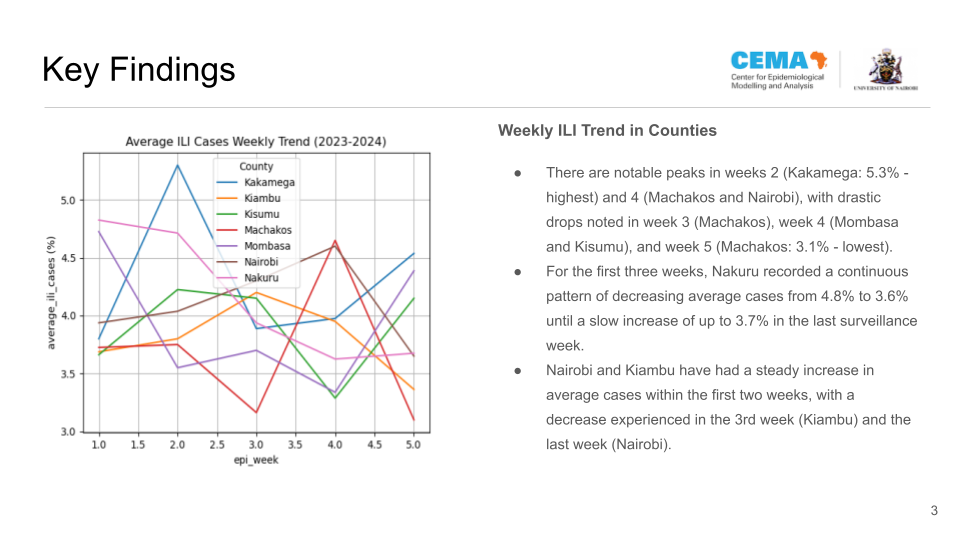

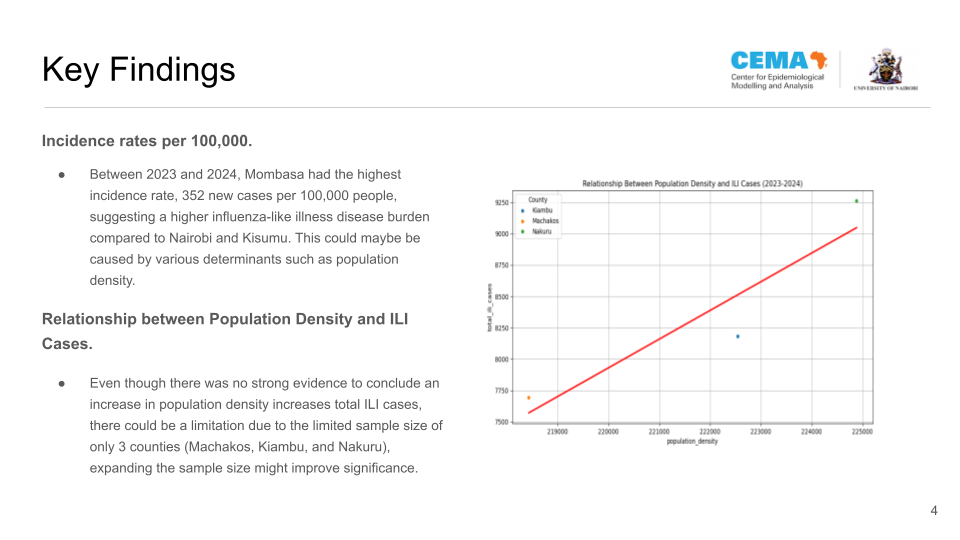

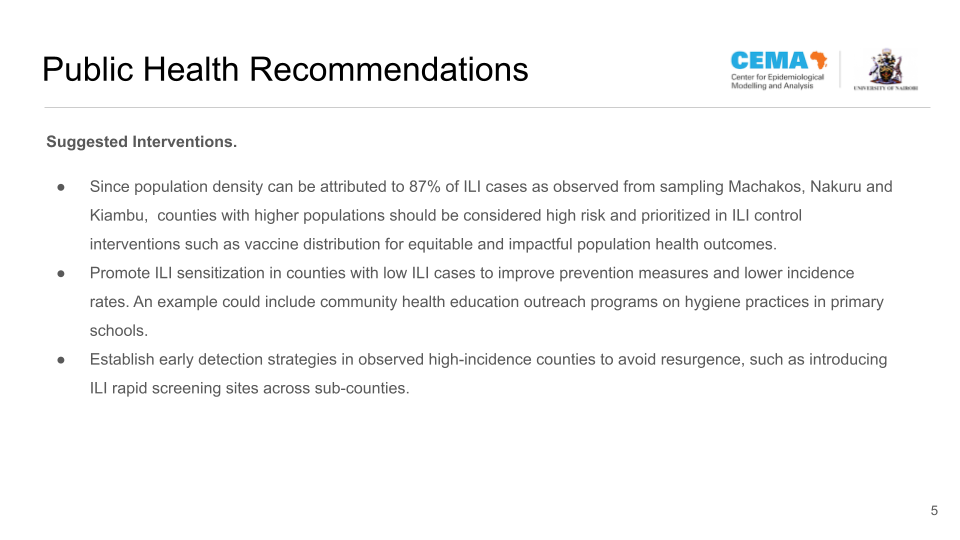

In [97]:
from IPython.display import Image, display

display(Image(filename='Intro_slide.png'))
display(Image(filename='Slide_1.png'))
display(Image(filename='Slide_2.png'))
display(Image(filename='Slide_3.png'))
display(Image(filename='Slide_4.png'))